# Regresión lineal múltiple


## Objetivos

Después de completar este laboratorio, podrá:

* Use scikit-learn para implementar la regresión lineal múltiple
* Cree un modelo, entrénelo, pruébelo y use el modelo


<h1>Índice</h1>

<div class="alerta alerta-bloque alerta-info" style="margin-top: 20px">
     <ol>
         <li><a href="https://#understanding-data">Comprensión de los datos</a></li>
         <li><a href="https://#reading_data">Leyendo los datos en</a></li>
         <li><a href="https://#multiple_regression_model">Modelo de regresión múltiple</a></li>
         <li><a href="https://#prediction">Predicción</a></li>
         <li><a href="https://#practice">Practica</a></li>
     </ol>
</div>
<br>
<hr>


### Importación de paquetes necesarios

In [2]:
# ESCRIBE TU CODIGO AQUI
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

<h2 id="understanding_data">Comprender los datos</h2>

### `FuelConsumption.csv`:

El conjunto de datos de consumo de combustible, **`FuelConsumption.csv`**, contiene clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para vehículos livianos nuevos para la venta minorista en Canadá.

[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Leyendo los datos en</h2>


In [3]:
# ESCRIBE EL CODIGO AQUI
# Lee los datos a la variable df 
df = pd.read_csv('FuelConsumption.csv')

# echa un vistazo al conjunto de datos
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Selecciona algunas características que queremos usar para la regresión.

In [4]:
# ESCRIBE EL CODIGO AQUI
cdf = df[['ENGINESIZE','CYLINDERS','CO2EMISSIONS']]

# echa un vistazo al conjunto de datos
cdf.head(9)

,ENGINESIZE,CYLINDERS,CO2EMISSIONS
0,2.0,4,196
1,2.4,4,221
2,1.5,4,136
3,3.5,6,255
4,3.5,6,244
5,3.5,6,230
6,3.5,6,232
7,3.7,6,255
8,3.7,6,267


Grafica los valores de emisión con respecto al tamaño del motor:

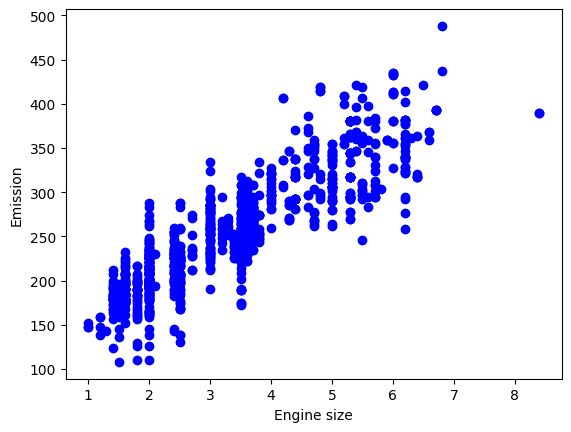

In [5]:
# ESCRIBE EL CODIGO AQUI
import matplotlib.pyplot as plt

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Crear conjunto de datos de prueba y entrenamiento

Train/Test Split implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba respectivamente, que son mutuamente excluyentes. Después de lo cual, entrena con el conjunto de entrenamiento y prueba con el conjunto de prueba.
Esto proporcionará una evaluación más precisa de la precisión fuera de la muestra porque el conjunto de datos de prueba no forma parte del conjunto de datos que se utilizó para entrenar el modelo. Por lo tanto, nos da una mejor comprensión de qué tan bien generaliza nuestro modelo en nuevos datos.

¡Conocemos el resultado de cada punto de datos en el conjunto de datos de prueba, por lo que es excelente para probar! Dado que estos datos no se han utilizado para entrenar el modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Entonces, en esencia, es realmente una prueba fuera de muestra.

Dividamos nuestro conjunto de datos en conjuntos de entrenamiento y prueba. Alrededor del 80 % de todo el conjunto de datos se utilizará para entrenamiento y el 20 % para pruebas. 


In [6]:
# ESCRIBE EL CODIGO AQUI
# Definir las variables independientes y dependientes
X = cdf[['ENGINESIZE']]
y = cdf[['CO2EMISSIONS']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Distribución de datos de entrenamiento (Elabora el gráfico de emisión con respecto al tamaño del motor)


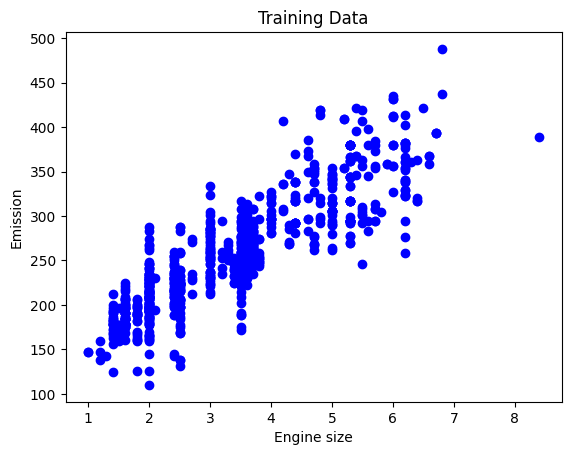

In [7]:
# ESCRIBE EL CODIGO AQUI
plt.scatter(X_train, y_train, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Training Data")
plt.show()

<h2 id="multiple_regression_model">Modelo de regresión múltiple</h2>


En realidad, existen múltiples variables que impactan la emisión de co2. Cuando está presente más de una variable independiente, el proceso se denomina regresión lineal múltiple. Un ejemplo de regresión lineal múltiple es la predicción de emisiones de co2 utilizando las características FUELCONSUMPTION_COMB, EngineSize y Cylinders of cars. Lo bueno aquí es que el modelo de regresión lineal múltiple es la extensión del modelo de regresión lineal simple.


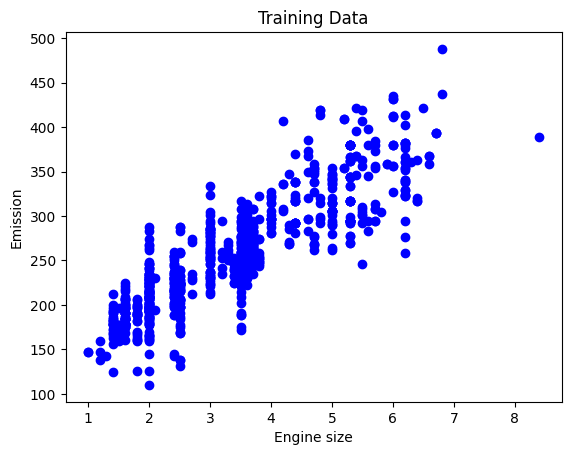

In [8]:
# ESCRIBE EL CODIGO AQUI
plt.scatter(X_train, y_train, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Training Data")
plt.show()

Como se mencionó anteriormente, **Coeficiente** e **Intersección** son los parámetros de la línea ajustada.
Dado que es un modelo de regresión lineal múltiple con 3 parámetros y que los parámetros son la intersección y los coeficientes del hiperplano, sklearn puede estimarlos a partir de nuestros datos. Scikit-learn utiliza el método simple de mínimos cuadrados ordinarios para resolver este problema.

#### Mínimos cuadrados ordinarios (OLS)

OLS es un método para estimar los parámetros desconocidos en un modelo de regresión lineal. OLS elige los parámetros de una función lineal de un conjunto de variables explicativas minimizando la suma de los cuadrados de las diferencias entre la variable dependiente objetivo y las predichas por la función lineal. En otras palabras, intenta minimizar la suma de los errores cuadráticos (SSE) o el error cuadrático medio (MSE) entre la variable objetivo (y) y nuestra salida pronosticada ($\hat{y}$) en todas las muestras del conjunto de datos.

OLS puede encontrar los mejores parámetros utilizando los siguientes métodos:

* Resolviendo los parámetros del modelo analíticamente usando ecuaciones de forma cerrada
* Utilizando un algoritmo de optimización (Gradient Descent, Stochastic Gradient Descent, Método de Newton, etc.)


<h2 id="predicción">Predicción</h2>


In [9]:
# ESCRIBE EL CODIGO AQUI
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo de regresión lineal
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Realizar la predicción en el conjunto de prueba
y_pred = regressor.predict(X_test)

In [10]:
print(y_pred)

[[309.55670218]
 [262.76512771]
 [266.66442558]
 [243.26863835]
 [204.27565962]
 [243.26863835]
 [266.66442558]
 [282.26161707]
 [321.2545958 ]
 [266.66442558]
 [266.66442558]
 [387.54265963]
 [251.06723409]
 [262.76512771]
 [266.66442558]
 [262.76512771]
 [188.67846813]
 [266.66442558]
 [188.67846813]
 [332.95248941]
 [321.2545958 ]
 [196.47706388]
 [251.06723409]
 [270.56372345]
 [243.26863835]
 [196.47706388]
 [204.27565962]
 [188.67846813]
 [340.75108516]
 [251.06723409]
 [336.85178729]
 [219.87285111]
 [196.47706388]
 [321.2545958 ]
 [243.26863835]
 [309.55670218]
 [282.26161707]
 [332.95248941]
 [204.27565962]
 [223.77214899]
 [188.67846813]
 [188.67846813]
 [180.87987239]
 [223.77214899]
 [282.26161707]
 [188.67846813]
 [243.26863835]
 [243.26863835]
 [204.27565962]
 [329.05319154]
 [368.04617027]
 [266.66442558]
 [204.27565962]
 [270.56372345]
 [243.26863835]
 [332.95248941]
 [332.95248941]
 [348.5496809 ]
 [204.27565962]
 [293.95951069]
 [282.26161707]
 [293.95951069]
 [297.85

In [11]:
# Imprimir la intersección y los coeficientes
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 [126.28970217]
Coefficients: 
 [[38.99297872]]


<h2 id="practica">Practica</h2>
Intente usar una regresión lineal múltiple con el mismo conjunto de datos, pero esta vez use FUELCONSUMPTION_CITY y FUELCONSUMPTION_HWY en lugar de FUELCONSUMPTION_COMB. ¿Resulta en una mejor precisión?


In [12]:
# write your code here
# Definir las nuevas variables independientes
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el nuevo modelo de regresión lineal
regressor_new = LinearRegression()  
regressor_new.fit(X_train, y_train)

# Realizar la predicción en el conjunto de prueba
y_pred_new = regressor_new.predict(X_test)

# Calcular y mostrar las nuevas métricas de error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_new)))


Mean Absolute Error: 16.70802186966452
Mean Squared Error: 511.51291559371543
Root Mean Squared Error: 22.61665129044783


In [13]:
from sklearn.feature_selection import RFECV

# Crear el objeto RFE
rfecv = RFECV(estimator=LinearRegression(), step=1, cv=5, scoring='neg_mean_squared_error')

# Ajustar el objeto RFE a los datos
rfecv.fit(X_train, y_train)

# Obtener el número óptimo de características
optimal_features = rfecv.n_features_

print('Número óptimo de características: ', optimal_features)

Número óptimo de características:  4


In [14]:
print('Coeficientes del modelo: \n', regressor_new.coef_)

Coeficientes del modelo: 
 [[11.23567565  7.0089373   5.59604353  3.81386072]]


In [15]:
from sklearn.metrics import r2_score

print('Coeficiente de determinación: ', r2_score(y_test, y_pred))

Coeficiente de determinación:  0.7615595731934373


In [16]:
print('Valores reales vs predicciones: \n', list(zip(y_test, y_pred)))

Valores reales vs predicciones: 
 [('CO2EMISSIONS', array([309.55670218]))]


In [17]:
import statsmodels.api as sm

# Añadir una constante a las características
X_train_sm = sm.add_constant(X_train)

# Ajustar el modelo
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

In [18]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1308.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:41:36   Log-Likelihood:                -3905.0
No. Observations:                 853   AIC:                             7820.
Df Residuals:                     848   BIC:                             7844.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   67.8271 

# MODELO ANOVA

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Añadir una constante a las características
model = ols('CO2EMISSIONS ~ ENGINESIZE + CYLINDERS + FUELCONSUMPTION_COMB', data=df).fit()

# Ajustar el modelo
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                             sum_sq      df           F         PR(>F)
ENGINESIZE             26533.938457     1.0   48.442844   5.940039e-12
CYLINDERS              24754.721143     1.0   45.194538   2.905673e-11
FUELCONSUMPTION_COMB  390464.567493     1.0  712.868696  1.338839e-120
Residual              582244.440514  1063.0         NaN            NaN


# Supuestos del modelo de regresión lineal

In [29]:
# ESCRIBE EL CODIGO AQUI
# Definir las variables independientes y dependientes
X = cdf[['ENGINESIZE']]
y = cdf[['CO2EMISSIONS']]
X = sm.add_constant(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo
model = sm.OLS(y_train, X_train).fit()

# Realizar la predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir el resumen del modelo
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     2761.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.25e-269
Time:                        11:50:42   Log-Likelihood:                -4128.7
No. Observations:                 853   AIC:                             8261.
Df Residuals:                     851   BIC:                             8271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.2897      2.704     46.701      0.0

In [30]:
#Calcula suma de cuadrados de los residuos
SSR = np.sum((y_pred - y_test)**2)

#Calcula suma de cuadrados totales
SST = np.sum((y_test - np.mean(y_test))**2)

#Calcula el coeficiente de determinación
r_squared = 1 - (SSR/SST)
print('Coeficiente de determinación:', r_squared)

#Calcula el coeficiente de determinación ajustado
n = len(X_test)
p = len(X_test.columns)
adjusted_r_squared = 1 - (1-r_squared)*(n-1)/(n-p-1)
print('Coeficiente de determinación ajustado:', adjusted_r_squared)


Coeficiente de determinación: 2               NaN
3               NaN
10              NaN
12              NaN
23              NaN
               ... 
1049            NaN
1058            NaN
1061            NaN
1063            NaN
CO2EMISSIONS    1.0
Length: 215, dtype: float64
Coeficiente de determinación ajustado: 2               NaN
3               NaN
10              NaN
12              NaN
23              NaN
               ... 
1049            NaN
1058            NaN
1061            NaN
1063            NaN
CO2EMISSIONS    1.0
Length: 215, dtype: float64


c:\Users\Adrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## Crea un modelo de regresión lineal múltiple con el método del gradiente descendente

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear un modelo de regresión lineal con gradiente descendente estocástico
# Es importante escalar las características antes de usar SGDRegressor
regressor = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

# Ajustar el modelo a los datos de entrenamiento
regressor.fit(X_train, y_train)

c:\Users\Adrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
# Hacer predicciones en los datos de prueba
y_pred = regressor.predict(X_test)

c:\Users\Adrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Adrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Adrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Adrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: D

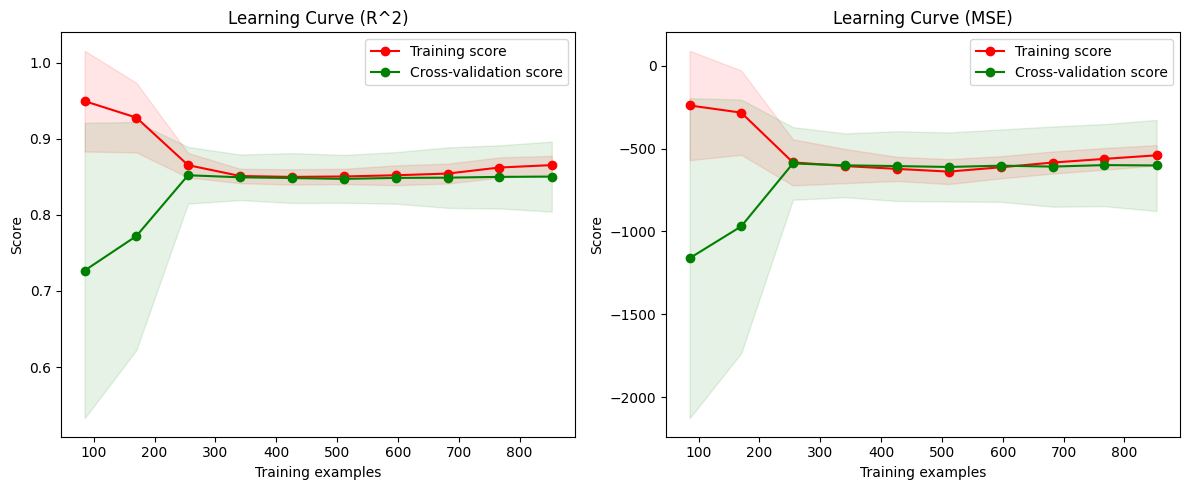

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Definir la función de puntuación para R^2 y MSE
r2_scorer = make_scorer(r2_score)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=5, scoring=r2_scorer, train_sizes=np.linspace(0.1, 1.0, 10))
train_sizes_abs, train_scores_mse, test_scores_mse = learning_curve(regressor, X, y, cv=5, scoring=mse_scorer, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular las medias y desviaciones estándar
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

train_scores_mse_mean = np.mean(train_scores_mse, axis=1)
train_scores_mse_std = np.std(train_scores_mse, axis=1)
test_scores_mse_mean = np.mean(test_scores_mse, axis=1)
test_scores_mse_std = np.std(test_scores_mse, axis=1)

# Trazar la curva de aprendizaje para R^2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (R^2)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

# Trazar la curva de aprendizaje para MSE
plt.subplot(1, 2, 2)
plt.fill_between(train_sizes_abs, train_scores_mse_mean - train_scores_mse_std, train_scores_mse_mean + train_scores_mse_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mse_mean - test_scores_mse_std, test_scores_mse_mean + test_scores_mse_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mse_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mse_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (MSE)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# Explicación

R^2: En la gráfica de la curva de aprendizaje para R^2, si ves que la puntuación de validación (verde) aumenta y se acerca a la puntuación de entrenamiento (rojo) a medida que se añaden más ejemplos de entrenamiento, esto indica que tu modelo se beneficia de más datos de entrenamiento.

MSE: En la gráfica de la curva de aprendizaje para MSE, si ves que la puntuación de validación (verde) disminuye y se acerca a la puntuación de entrenamiento (rojo) a medida que se añaden más ejemplos de entrenamiento, esto indica que tu modelo se beneficia de más datos de entrenamiento.